In this lab, you will be using the Sakila database of movie rentals.

In order to optimize our inventory, we would like to know 
# which films will be rented next month and we are asked to create a model to predict it.


Instructions
1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
2. Read the data into a Pandas dataframe.
3. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
4. Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.
5. Create a logistic regression model to predict this variable from the cleaned data.
6. Evaluate the results.

1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features.
2. Read the data into a Pandas dataframe.


In [28]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
password = getpass.getpass()

········


In [29]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'

In [30]:
engine=create_engine(connection_string)

In [31]:
query = '''  
        select r.rental_id, r.rental_date,f.*, fc.category_id, fa.actor_id,
case when month(r.rental_date) = 2 and year(r.rental_date) = 2006
then '1'
else '0'
end as last_month_rented
from sakila.rental r
left join inventory i on r.inventory_id = i.inventory_id
left join film f on i.film_id = f.film_id
left join film_category fc on f.film_id = fc.film_id
left join film_actor fa on fc.film_id = fa.film_id
'''

In [32]:
query1 =''' select f.film_id, f.title,f.release_year,f.language_id,f.original_language_id,f.rental_duration,f.rental_rate,f.length,f.replacement_cost,f.rating,f.special_features,
r.rental_id,r.rental_date,r.inventory_id,r.customer_id,r.return_date,r.staff_id,i.store_id,
case when month(r.rental_date) = 2 AND YEAR(r.rental_date) = 2006 
            THEN 'True' 
            ELSE 'False' 
       END AS rented_last_month
from sakila.inventory i
join sakila.film f on i.film_id = f.film_id
join sakila.rental r on i.inventory_id = r.inventory_id'''

In [33]:
data = pd.read_sql_query(query1,engine)

In [34]:
data

,film_id,title,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,store_id,rented_last_month
0,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",4863,2005-07-08 19:03:15,1,431,2005-07-11 21:29:15,2,1,False
1,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",11433,2005-08-02 20:13:10,1,518,2005-08-11 21:35:10,1,1,False
2,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",14714,2005-08-21 21:27:43,1,279,2005-08-30 22:26:43,1,1,False
3,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",972,2005-05-30 20:21:07,2,411,2005-06-06 00:36:07,1,1,False
4,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2117,2005-06-17 20:24:00,2,170,2005-06-23 17:45:00,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",711,2005-05-29 03:49:03,4581,215,2005-05-31 08:29:03,2,2,False
16040,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",1493,2005-06-15 21:50:32,4581,235,2005-06-17 01:02:32,2,2,False
16041,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",6712,2005-07-12 13:24:47,4581,226,2005-07-20 09:35:47,2,2,False
16042,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",9701,2005-07-31 07:32:21,4581,401,2005-08-01 05:07:21,2,2,False


3. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
4. Create a query to get the list of films and a boolean indicating if it was rented last month. This would be our target variable.
5. Create a logistic regression model to predict this variable from the cleaned data.
6. Evaluate the results.

In [36]:
#Print info for the dataframe
print('\n\n\nDescription of output data frame \n')
data.info()




Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               16044 non-null  int64         
 1   title                 16044 non-null  object        
 2   release_year          16044 non-null  int64         
 3   language_id           16044 non-null  int64         
 4   original_language_id  0 non-null      object        
 5   rental_duration       16044 non-null  int64         
 6   rental_rate           16044 non-null  float64       
 7   length                16044 non-null  int64         
 8   replacement_cost      16044 non-null  float64       
 9   rating                16044 non-null  object        
 10  special_features      16044 non-null  object        
 11  rental_id             16044 non-null  int64         
 12  rental_date           16044 non-null

In [37]:
for i in data.columns:
    print("\n",i)
    print(data[i].value_counts())
    print("\n")


 film_id
103    34
738    33
730    32
382    32
489    32
       ..
343     5
94      5
400     4
584     4
904     4
Name: film_id, Length: 958, dtype: int64



 title
BUCKET BROTHERHOOD     34
ROCKETEER MOTHER       33
RIDGEMONT SUBMARINE    32
GRIT CLOCKWORK         32
JUGGLER HARDLY         32
                       ..
FULL FLATLINERS         5
BRAVEHEART HUMAN        5
HARDLY ROBBERS          4
MIXED DOORS             4
TRAIN BUNCH             4
Name: title, Length: 958, dtype: int64



 release_year
2006    16044
Name: release_year, dtype: int64



 language_id
1    16044
Name: language_id, dtype: int64



 original_language_id
Series([], Name: original_language_id, dtype: int64)



 rental_duration
3    3412
6    3392
4    3251
5    3165
7    2824
Name: rental_duration, dtype: int64



 rental_rate
0.99    5652
4.99    5272
2.99    5120
Name: rental_rate, dtype: int64



 length
85     305
112    243
84     216
178    209
92     196
      ... 
55      42
94      42
72      42


In [38]:
data

,film_id,title,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,store_id,rented_last_month
0,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",4863,2005-07-08 19:03:15,1,431,2005-07-11 21:29:15,2,1,False
1,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",11433,2005-08-02 20:13:10,1,518,2005-08-11 21:35:10,1,1,False
2,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",14714,2005-08-21 21:27:43,1,279,2005-08-30 22:26:43,1,1,False
3,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",972,2005-05-30 20:21:07,2,411,2005-06-06 00:36:07,1,1,False
4,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2117,2005-06-17 20:24:00,2,170,2005-06-23 17:45:00,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",711,2005-05-29 03:49:03,4581,215,2005-05-31 08:29:03,2,2,False
16040,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",1493,2005-06-15 21:50:32,4581,235,2005-06-17 01:02:32,2,2,False
16041,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",6712,2005-07-12 13:24:47,4581,226,2005-07-20 09:35:47,2,2,False
16042,1000,ZORRO ARK,2006,1,None,3,4.99,50,18.99,NC-17,"Trailers,Commentaries,Behind the Scenes",9701,2005-07-31 07:32:21,4581,401,2005-08-01 05:07:21,2,2,False


In [41]:
# Correct way to drop multiple columns
data = data.drop(['rental_id', 'rental_date', 'return_date', 'release_year', 'language_id'], axis=1)

In [42]:
#seperate numerical and categorical columns
df_numeric=data.select_dtypes(include=["float", "int"])
df_object=data.select_dtypes(include=[object]) 

In [24]:
#Numeric variables cleaning
null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n nulls have been replaced 0\n\n\n")
#Put 0 in those which have nulls.
for  Column_to_change in null_columns:
    df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0)




Numerical columns that contains null values: 
  [] 
 nulls have been replaced 0





C:\Users\ilike\AppData\Local\Temp\ipykernel_2624\3597185393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr(method='pearson')  # default


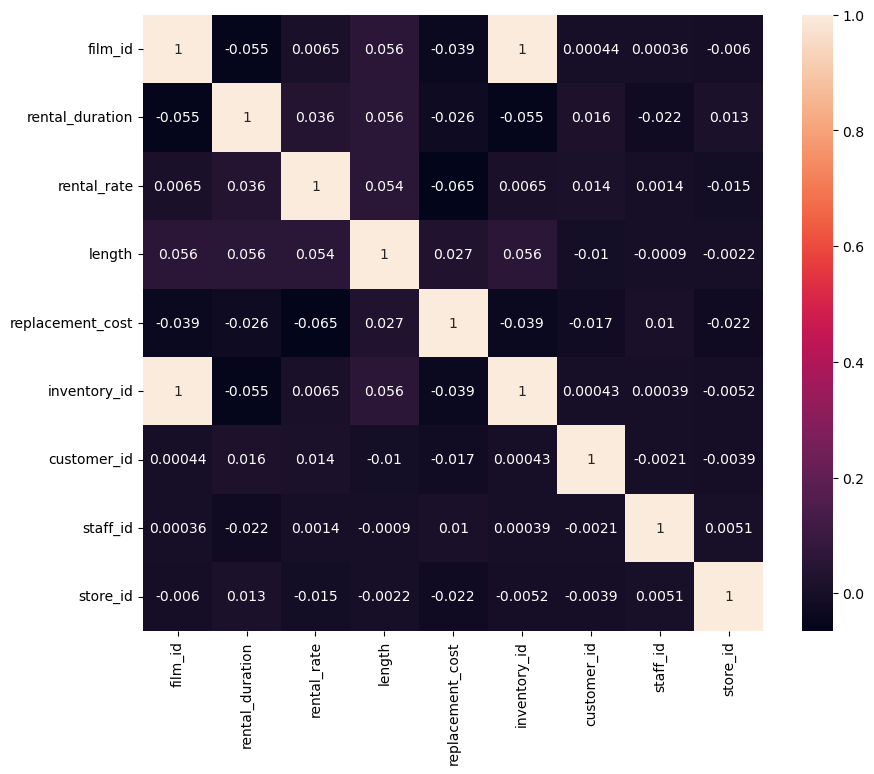

In [45]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [46]:
X = pd.get_dummies(data.drop('rented_last_month', axis=1))
y = data['rented_last_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

C:\Users\ilike\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ilike\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.99      1.00      0.99      6345
        True       0.00      0.00      0.00        73

    accuracy                           0.99      6418
   macro avg       0.49      0.50      0.50      6418
weighted avg       0.98      0.99      0.98      6418



C:\Users\ilike\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
